In [28]:
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv('my_data.csv')

In [30]:
data.head()

,Time,Host,Type,Value
0,20:01:01,SERVERA,IOPS_r,1856.000
1,20:01:01,SERVERA,IOPS_t,1990.000
2,20:01:01,SERVERA,IOPS_w,134.000
3,20:01:01,SERVERA,BAND_r,400.967
4,20:01:01,SERVERA,BAND_t,409.705


In [31]:
data2= pd.read_csv('delack_data.csv')

In [32]:
data2.head()

,WP_USED,WP_MAX,DEL_ACK
0,0.21,38400,37937
1,0.13,38400,8760
2,0.16,38400,62789
3,0.30,38400,22226
4,0.31,38400,37937


In [33]:
data2.describe()

,WP_USED,WP_MAX,DEL_ACK
count,20.000000,20.0,20.00000
mean,0.148000,38400.0,32928.00000
std,0.103497,0.0,20618.04543
min,0.020000,38400.0,8760.00000
25%,0.047500,38400.0,18859.50000
50%,0.145000,38400.0,30081.50000
75%,0.242500,38400.0,44150.00000
max,0.310000,38400.0,62789.00000


In [34]:
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
data2.head()

,WP_USED,WP_MAX,DEL_ACK
0,0.21,38400,37937
1,0.13,38400,8760
2,0.16,38400,62789
3,0.30,38400,22226
4,0.31,38400,37937


In [36]:
x = data2.iloc[:, :-1]
y = data2.iloc[:, -1]

In [37]:
y.head

<bound method NDFrame.head of 0     37937
1      8760
2     62789
3     22226
4     37937
5      8760
6     62789
7     22226
8     37937
9      8760
10    62789
11    22226
12    37937
13     8760
14    62789
15    22226
16    37937
17     8760
18    62789
19    22226
Name:       DEL_ACK, dtype: int64>

In [38]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [39]:
linearRegressor = LinearRegression()


In [40]:
linearRegressor.fit(xTrain, yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
yPrediction = linearRegressor.predict(xTest)

In [42]:
for x in yPrediction:
    print(x)

28870.312293494357
29825.64230374843
29044.008658995095
30259.883217500283
29391.40138999658
28870.312293494357
30867.820496752876


In [43]:
for x in yTest:
    print(x)

62789
8760
22226
37937
62789
8760
62789


In [44]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# fig, axis = plt.subplots()
# # Grid lines, Xticks, Xlabel, Ylabel

# axis.yaxis.grid(True)
# axis.set_title('corrrelation',fontsize=10)
# axis.set_xlabel(data2['WP_USED'].iloc[0],fontsize=10)
# axis.set_ylabel(data2['DEL_ACK'].iloc[0],fontsize=10)

# X = data2['WP_USED']
# Y = data2['DEL_ACK']

# axis.scatter(X, Y)
# plt.show()

In [45]:
###########LOCALBLK DATA

In [46]:
localblk_data= pd.read_csv('locallblk_data.csv')

In [47]:
localblk_data.head()

,Type,Accesses,Hits,Hit%,LockBlk
0,1,497754,291175,58,131
1,0,265116,26741,10,21171
2,1,455027,255402,56,125
3,0,275535,28893,10,22936
4,0,3879498,257531,7,2535216


In [48]:
localblk_data.shape

(31, 5)

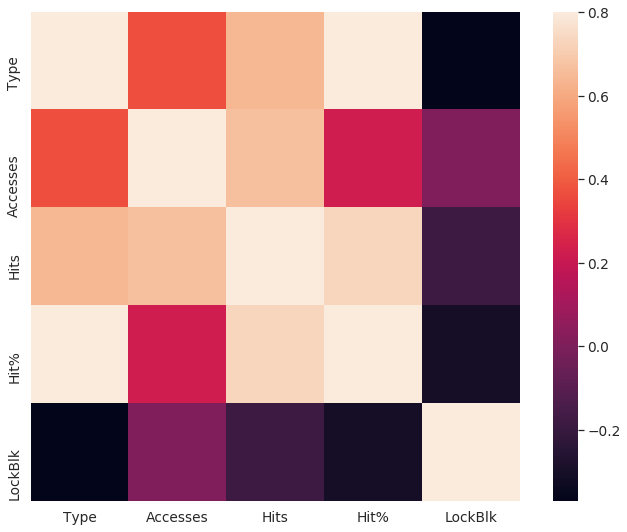

In [49]:
import seaborn as sns
# Correlation Matrix Heatmap
corrmat = localblk_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

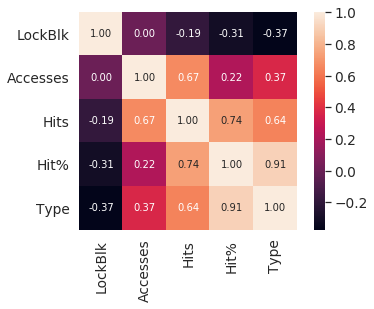

In [50]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LockBlk')['LockBlk'].index
cm = np.corrcoef(localblk_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [51]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,LockBlk
1,Accesses
2,Hits
3,Hit%
4,Type


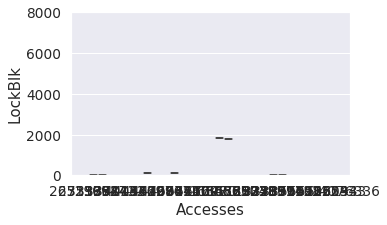

In [52]:
# Overall Quality vs Sale Price
var = 'Accesses'
data = pd.concat([localblk_data['LockBlk'], localblk_data[var]], axis=1)
f, ax = plt.subplots(figsize=(5, 3))
fig = sns.boxplot(x=var, y="LockBlk", data=localblk_data)
fig.axis(ymin=0, ymax=8000);

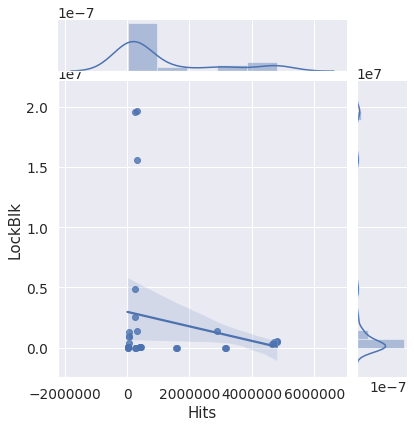

In [53]:
sns.jointplot(x=localblk_data['Hits'], y=localblk_data['LockBlk'], kind='reg')

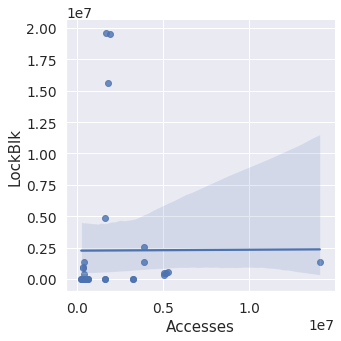

In [59]:
sns.lmplot(x='Accesses', y='LockBlk', data= localblk_data)

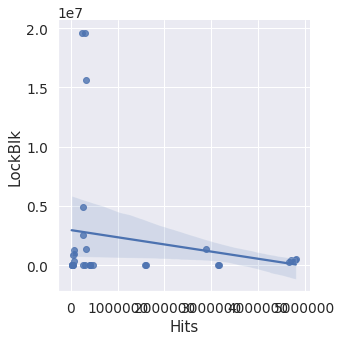

In [60]:
sns.lmplot(x='Hits', y='LockBlk', data= localblk_data)

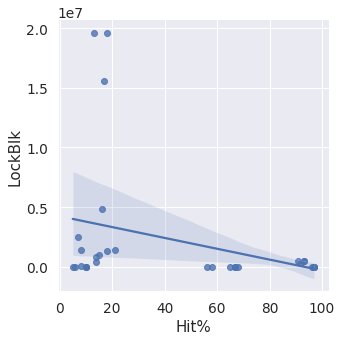

In [61]:
sns.lmplot(x='Hit%', y='LockBlk', data= localblk_data)

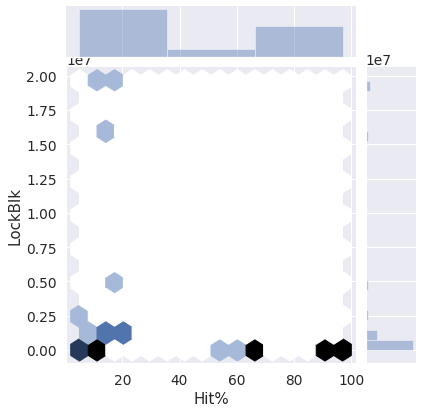

In [63]:
sns.jointplot('Hit%','LockBlk', data= localblk_data,kind="hex")

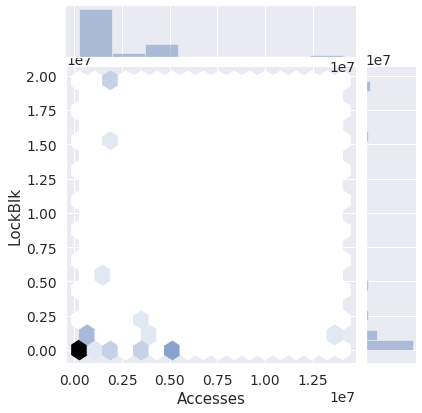

In [64]:
sns.jointplot('Accesses','LockBlk', data= localblk_data,kind="hex")